In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_absolute_error, mean_squared_error


## Load Forecast

In [2]:

arima_df = pd.read_csv("Data/processed/arima_forecast.csv")
prophet_df = pd.read_csv("Data/processed/prophet_forecast.csv")



## Evaluation Function

In [5]:
def evaluate_model(df, model_name):
    """
    Compute MAE and RMSE for a given forecast dataframe.
    """
    mae = mean_absolute_error(df['Actual'], df['Forecast'])
    rmse = np.sqrt(mean_squared_error(df['Actual'], df['Forecast']))

    print(f" {model_name} Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    return {'Model': model_name, 'MAE': mae, 'RMSE': rmse}


## Evaluate All Models

In [6]:
results = []

results.append(evaluate_model(arima_df, "ARIMA"))
results.append(evaluate_model(prophet_df, "Prophet"))


results_df = pd.DataFrame(results)


 ARIMA Evaluation:
MAE: 0.07
RMSE: 0.09
 Prophet Evaluation:
MAE: 6.27
RMSE: 7.75


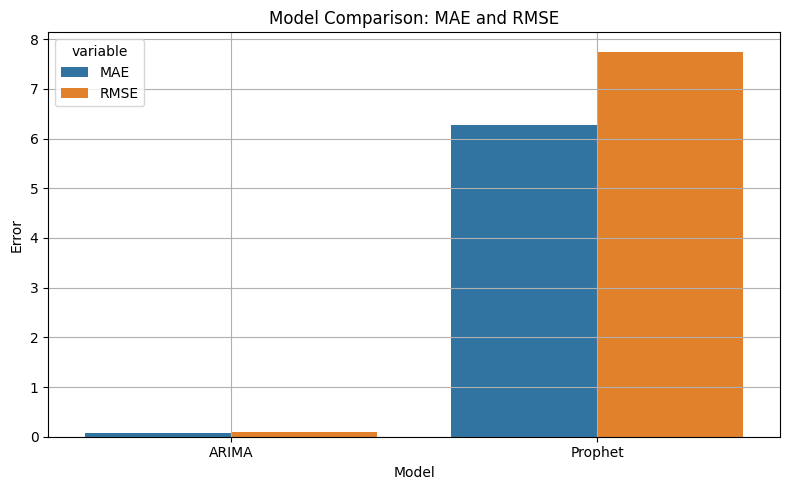

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Model Comparison: MAE and RMSE")
plt.ylabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()


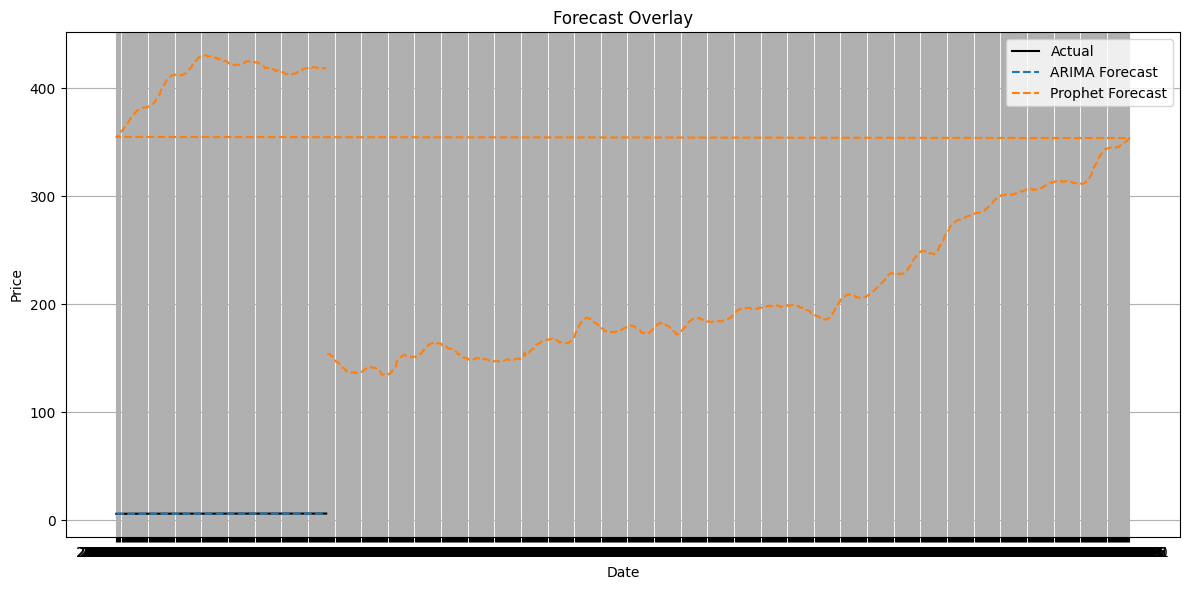

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(arima_df['Date'], arima_df['Actual'], label='Actual', color='black')
plt.plot(arima_df['Date'], arima_df['Forecast'], label='ARIMA Forecast', linestyle='--')
plt.plot(prophet_df['Date'], prophet_df['Forecast'], label='Prophet Forecast', linestyle='--')



plt.title("Forecast Overlay")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
results_df.to_csv("model_evaluation_summary.csv", index=False)
print(" Evaluation summary saved to 'reports/model_evaluation_summary.csv'")


 Evaluation summary saved to 'reports/model_evaluation_summary.csv'
